In [1]:
import numpy as np 
import  matplotlib.pyplot as plt


# 신경망의 기초


신경망은 컴퓨터의 역사와 거의 동시에 시작되었다고 해도 과언이 아닐 정도로 오래된 학문이다. 하지만 오랜동안 단층신경망에 대한 연구가 중심을 이뤘고 단층신경망의 한계에 대한 지적(XOR 문제) 에 의해 한때 긴 침채기를 맞은 후에 다시 다층 신경망 오류 역전파 모델에 의해 그 한계를 극복하고 부활하였다. 본 자료에서는 신경망의 기초가 되는 가장 기초적인 수렴에 의한 문제해결방법을 고찰해 보고, 역전파모델의 기초가 되는 경사하강법에 대해 학습해본다. 
*이탤릭체 텍스트*



##  수렴에 의한 단순 회귀분석


### 데이터 만들기

먼저 x * 2 = y 에 오차가 포함된 데이터를 상정해보자.  이때 1부터 10까지의 랜덤한 가중치를 알아내야 한다고 가정해보자.  x 는 0부터 1까지의 값을 20개로 나누고 오차값은 0을 중심으로 0.1 의 표준편차이 랜덤치로 생성한다. 



In [ ]:
x = np.linspace(0,1,20)
y = x * 2 + np.random.normal(0, 0.1,20)

plt.plot(x,y,'.')

이제 이 데이터의 오차를 최소화하는 w 를 회귀분석 라이브러리 없이 찾아보자. 

### w 초기값 랜덤 생성 

이를 위해 먼저 아무거나 랜덤한 w 값을 설정해보도록 하겠다. 

In [ ]:
w = np.random.random() * 10 
print("init w :",w_init)

### 오차값 계산 

각 x 의 오차 d는 다음의 식에 의해서 생성한다. 

```
d = y - x * w 
```
이제 모든 x 에 대해 y 와 오차를 출력해보자. 


In [ ]:
for i in range( len(x) ) : 
  d = y[i] - x[i] * w 
  print(y[i] - x[i] * w)

### 크면 작게 작으면 크게 

이제 아주 단순한 방법으로 w 를 변경해보도록 하겠다. 
```
d 가 0보다 크면 w 값을 키우고 0보다 작으면 w를 줄인다. 
```
이때 변화량은 일단 0.1로 고정하고 프로그램을 작성해보도록 한다. 



In [ ]:
for i in range( len(x) ) : 
  d = y[i] - x[i] * w 
  if d > 0 : 
    w = w + 0.1
  else:
    w = w - 0.1  
  print(w)


#### <font color = 'chocolate'>실습: d 의 변화량을 그려보기 
w를 초기화하고 이 코드를 n 회 반복해서 실행해 w가 기울기에 가까워져가는 과정을 도식화해보자. 
</font>

In [ ]:
w = np.random.random() * 10 

#실습 코드를 작성해보세요




### d에 비례해서 적용

위의 방식은 수렴의 속도가 일정하며 후반에 0.1을 기준으로 진동이 발생할 확률이 높다.  하지만 오차가 크면 변화량을 늘이는 방법은 어떨까?  이제 다음의 방법을 적용해 보도록 하겠다. 

```
    d = y - x * w  
    w += d * 0.1 
```

이제 이것을 모든 x[i], y[i] 에 대해 처리하는 것을 10번 반복한 후에 w 값을 보도록하자. 

In [ ]:
w = np.random.random() * 10 

ws, ds = [],[]
for step in range(10):
    for i in range(len(x)) :
        d = (y[i] - x[i] * w)               
        w += d * 0.1

print(w)

w 가 원래 설정한 계수에 근접한 것을 볼 수 있을것이다. 이렇게 오차량에 비례하여 변화량을 조절함으로서 우리가 원하는 수치에 근접해가는 것을 알 수 있댜.



#### <font color = 'chocolate'>실습: d 의 변화량을 그려보기 2
이번에도 w를 초기화하고 w와 d 의 변화를 그래프로 그린 후에 고정 변화량과 비례 변화량의 수렴속도를 비교해보자. 
</font>

In [ ]:
w = np.random.random() * 10 
# 실습의 코드를 작성하세요


### d 의 합산 값으로 수렴

d에 비례해 변화량을 정하는 방식은 고정 변화량에 비해 더 안정적이고 빠르다. 하지만  개별 데이터에 대해 이를 처리하기 때문에 완전한 수렴이 안되며 후반에 진동이 발생한다.

사실 회귀분석은 전체 데이터 x 에 대해 최소값을 구하는 것이므로 이번에는 전체 데이터에 대한 오차값을 구하는 방법이 더 효율적이다. 단 전체 d 의 합산값에 대해 처리하므로 이번엔 계수를 0.01로 맞춰주도록 하겠다. 


In [ ]:
w = np.random.random() * 10 
ds,ws  = [],[]
for step in range(700):   
  d = 0
  for i in range(len(x)) :
    d += (y[i] - x[i] * w) 
  w += d * 0.01
  ds = ds + [d]
  ws = ws + [w]

plt.plot(ds)
plt.show()
plt.plot(ws)
plt.show()
print(w)

상당히 깔끔하게 그려진 것을 볼 수 있다. 그런데 
```
d = 0
for i in range(len(x)) :
  d += (y[i] - x[i] * w) 
```

이 코드는 다음과 같이 더 간단히 할 수 있다. 

```
d = np.sum(y - x * w)
```

이제 위의 코드를 간략화시켜 완성시켜본다. 



In [ ]:
w = np.random.random() * 10 
ds,ws  = [],[]
for step in range(700):   
  d = np.sum(y - x * w)
  w += d * 0.01
  ds = ds + [d]
  ws = ws + [w]

plt.plot(ds)
plt.show()
plt.plot(ws)
plt.show()

print(w)

<br><br><br>

<hr>

## 다중 회귀분석 해보기 

이번에는 두개의 입력값 x1, x2 에 대해 다음과 같은 공식으로 생성된 x,y 를 상정해 보겠다. 
```
y =  x1 * 2 + x2 * -4
```
이제 이 데이터를 회귀분석 하는 방법에 대해 생각해보도록 하겠다.  



### 다중 회귀 데이터 만들기 

우선 weight 는 2개가 필요하며 -10~10 사이의 값으로 생성한다. 
```
w = np.random.random(2) * 20 - 10
```
x1, x2 도 만들어주도록 하겠다.  이번에는 x1, x2 는 순차적인 값이 아닌 0~1 사이의 랜덤값으로 생성한다. 
```
x = np.random.random((n,2))
```




#### <font color = 'chocolate'>실습: y 값을 만들기 
위의 x (x1, x2) 에 대해 y = x1 * 2 + x2 * -4 인 y 값을 만들되 위와 마찬가지로  표준편차 0.1 의 오차를 지니도록 생성해보자. 
</font>

In [ ]:
n = 20 # 데이터 갯수
w = np.random.random(2) * 20 - 10
x = np.random.random((n,2))
# y값을 직접 만들어보세요 


### 단순회귀처럼 다중회귀 적용

이제 위의 단순회귀분석처럼 다중 회귀 분석 코드를 작성해보자. 이번에는 다시 개별 x[i] 에 대해 오차를 구하고 w 값에 변화를 주도록 하자. 
```
for i in range(len(x)):
  d = y[i] - np.sum( x[i] * w )  
```


In [ ]:
w = np.random.random(2) * 20 - 10
ds,ws  = [],[]
for step in range(20):   
  for i in range(len(x)):
    d = y[i] - np.sum( x[i] * w ) 
    w += d * 0.1  
  ds = ds + [np.abs(d)]
  ws = ws + [w]

plt.plot(ds)
plt.show()
print(w,d)



아마 그래프가 수렴하지만 0에 수렴하지는 안을 것이다. 이는 두 w 값이 동시에 같은 변경값을 같기 때문에 각각의 수렴을 거치지 못하면서 생기는 문제이다. 요컨데 단순히 오차값을 통해 같은 변경값을 w1, w2 에 적용시키는 것으로는 문제가 해결되지 안는다. 




### 오차를 분배하기 

두개 이상의 입력값과 그 입력값들의 계수 w에 의해 발생한 오차값을 이용해 각각의 w 를 수렴시킬 수 있을까?  그 문제에 대한 답은 

```
오차값을 x 의 크기에 따라 분배한다 
```
이다.  요컨데 x1,x2 = 0.1,1 에 의해 오차가 3 이 발생했다면 w1 은 오차값에 다시 x1 의 값인 0.1 을 곱해주고 w2 는 x2 인 1 을 곱해서 적용시켜주는 것이다. 요컨데 
```
오차값에 기여도를 입력 값으로부터 부여
```
의 원리이다.  이것을 코드에 적용하면 다음과 같다. 

```
w += d * 0.1  
=> 
w += d * 0.1 * x[i]
```

이제 이것을 적용하여 코드를 돌려보고 그 결과를 보도록하자 


In [ ]:
w = np.random.random(2) * 20 - 10
ds,ws  = [],[]
for step in range(100):   
  for i in range(len(x)):
    d = y[i] - np.sum( x[i] * w )  
    w += d * x[i] * 0.1  
  ds = ds + [np.abs(d)]
  ws = ws + [w]

plt.plot(ds)
plt.show()
print(w,d)

이제 실제로 우리가 처음 적용한 계수 2와 -4 에 근접해가는 것을 볼 수 있을 것이다.  이것이 여러개의 입력 값에 해당하는 계수를 맞춰가는 원리이며 신경망이 많은 입력 값이 특정 출력값에 수렴하도록 계숙값을 변화시켜가는 근본원리이다. 



### 행렬연산으로 변경하기 

그렇다면 이이 분배방식은 반드시 개별 x 에 대해 연산이 이뤄져야 하는가?  그렇지 안다.  x 와 오차값을 다시 한번 출력해보도록하자. 

In [ ]:
for i in range(len(x)):
  d = y[i] - np.sum( x[i] * w )  

이것은 다음의 연산으로 한번에 배열로 바꿀 수 있다. 

In [ ]:
d = y - np.sum( x * w , axis = 1 )
print(d)

여기에 x 값을 곱하면 어떨까?  하지만 x 는 n * 2 의 행렬이고 d 는 n 행렬이므로 둘을 곱하기 위해선 n * 1 행렬로 바꿔줘야한다. 

In [ ]:
print( d.reshape(-1,1) * x)

이 값은 각각 w1, w2 에 적용되는 비율이다. 그리고 이들을 세로축(axis=0) 으로 합산하면 w1, w2 에 적용되야 하는 변경값들이 합산된다. 

In [ ]:
print( np.sum( d.reshape(-1,1) * x, axis = 0 ) )


이들은 전체 변경값의 합산값이므로 0.01 의 변경률을 적용시키도록 하겠다. 

In [ ]:
w += np.sum( d.reshape(-1,1) * x, axis = 0 ) * 0.01
print(w)

#### <font color = 'chocolate'>실습: 다중 회귀 간략화하기
위의 코드를 적용해 다중회귀를 numpy 연산을 통해 전체 변경값을 한번에 구해 처리할 수 있도록 간략화하세요. 또한 그래프로 d 의 변화를 출력할 수 있는 방법을 찾으세요
</font>




In [ ]:
w = np.random.random(2) * 20 - 10
ds,ws  = [],[]
for step in range(100): 

  # 아래의 코드를 간략화시키고 d 값의 그래프를 그릴 수 있도록 변경하세요  
  '''
  for i in range(len(x)):
    d = y[i] - np.sum( x[i] * w )  
    w += d * x[i] * 0.1  
  ds = ds + [np.abs(d)]
  '''

  ws = ws + [w]

plt.plot(ds)
plt.show()
print(w,d)

#weight값을 수정할때는 입력값에 비례해야한다 

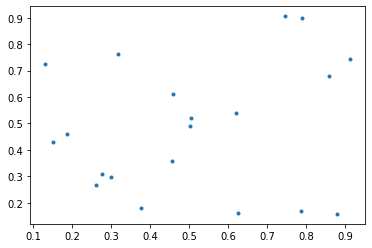

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.random.random(20)
x2 = np.random.random(20)
x = np.c_[x1,x2]
y = x1 * 7 + x2 * 15 + np.random.normal(0,0.1,20) - 8
plt.plot(x1,x2,'.')

[ 7.07438194 15.07147737] -8.103954309042233


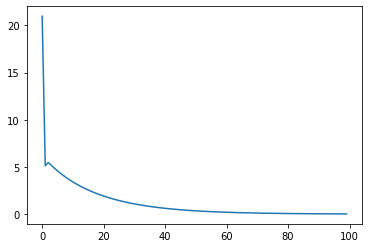

In [6]:
x1 = np.random.random(20)
x2 = np.random.random(20)
x = np.c_[x1,x2]
y = x1 * 7 + x2 * 15 + np.random.normal(0,0.1,20) - 8
w = np.random.random(2) # 가중치
ds = []
b = 0 #바이어스 
for step in range(100):
  dsum = 0
  for i in range(20):
    o = np.sum(x[i] * w) + b
    d = y[i] - o
    dsum += d
    w += d * x[i] * 0.1
    b += d * 0.1
  ds += [abs(dsum)]
print(w, b) # 7 15 -8 가까우면 성공 
plt.plot(ds)

## bias 

회귀분석을 기억하는 사람들은 지금까지의 전개에서 뭔가 허전함을 느끼는 사람이 있을 것이다.  회귀분석은 coef_ 와 함께 intercept_ 값이 사용되었다. 요컨데 x의 0승 즉, 1의 계수값이 존재한다. 

지금까지 위에서 다룬 기법으로는 다음과 같은 
```
y = x * 5 + 3 
```
같은 데이터를 완벽하게 해석하지 못한다. 수학에서 y절편이라고 불리우는 이 부분은 신경망에서는 bias 라고 부른다.  지금부터 이 bias 를 다루는 방법에 대해 알아보자. 

먼저 다음과 같은 데이터를 가정한다. 

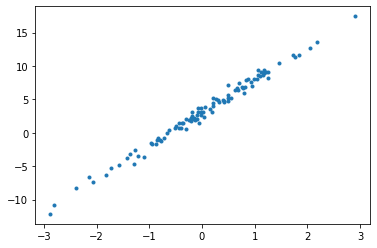

In [9]:
n = 100
x = np.sort( np.random.normal(0,1,n) )
y = x * 5 + 3 + np.random.normal(0,0.5,n)

plt.plot(x,y,'.')

이 데이터는 위의 방법으로 풀 경우는 정확한 해석이 불가능하다. 

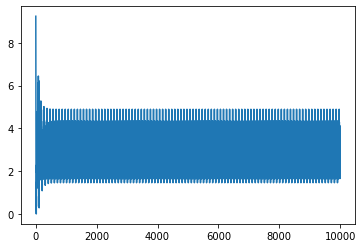

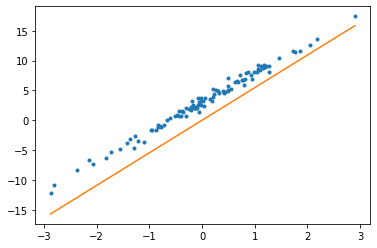

5.462736782158692 3.0391018029730192


In [10]:
w = np.random.rand() * 20 - 10 
ds = []
for step in range(100):
  for i in range(n):
    d = y[i] - ( w * x[i] )
    w += x[i] * d * 0.01    
    ds += [abs(d)]

plt.plot(ds)
plt.show()

plt.plot(x,y,'.')
plt.plot(x, x*w )
plt.show()

print(w,b)


사실 당연하 5 * x + 3 은  ? * x 로 해결이 될리가 없다. 당연히 ? * x + ? 형태로 바꿔주어야 한다.  이제 이 상수항을 bias 로 부르고  b 로 표현해보겠다. 그러면 이제 출력과 오차는 다음과 같다. 
```
o = x * w + b
d = y - o 
```

문제는 이 상수항은 어떻게 업데이트 해줘야 하는가?  이다.  우리는 위에서 기여도라는 개념으로 오류에 대한 피드백을 서로 다르게 주는 
```
wd = x[i] * d * 0.01 
w += wd 
```
이라는 방식을 설명하였다.  이 경우 x 값에 비례해 오차값을 적용한다.  그렇다면 bias 는 대체 어떤 값에 비례해 적용해야 하는가? 

가만 생각해보면 의외로 간단하다. bias 는 입력값이 항상 1인 변수의 계수라고 가정하면 된다. 

x1,x2 = 0.1, 0.2 라고 가정할때 w1 은 0.1 * d , w2 는 0.2 * d 에 학습률(0.01) 을 곱한 형태로 들어가지만 b 는 언제나 일정한 기여를 하므로 1 * d 에 학습률을 기여도로 적용하면 된다. 
```
b += d * 0.01 
```
참고로 bias 의 경우 대부분 랜덤값이 아닌 0 에서 시작하는 것을 선호한다. 
이제 이 bias 값 b를 추가하여 코드를 작성하도록 하겠다. 


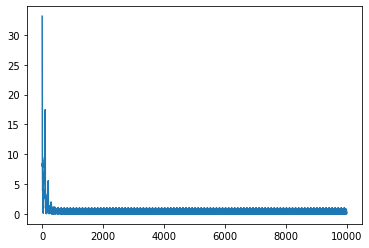

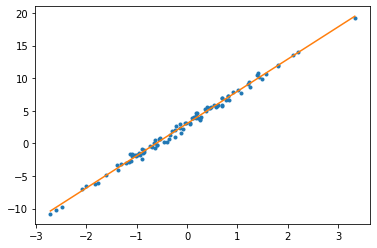

4.944052237242868 3.047027920369262


In [2]:
#wd weight수정값 
# 돌려보면 상수항 적용된다 
n = 100
x = np.sort( np.random.normal(0,1,n) )
y = x * 5 + 3 + np.random.normal(0,0.5,n)

w = np.random.rand() * 20 - 10 
b = 0 
ds = []
for step in range(100):
  for i in range(n):
    d = y[i] - ( w * x[i] + b )
    w += x[i] * d * 0.01
    b += d * 0.01
    ds += [abs(d)]

plt.plot(ds)
plt.show()


plt.plot(x,y,'.')
plt.plot(x, x*w + b)
plt.show()

print(w,b)


아마도 이제는 깔끔하게 해결된 것을 볼 수 있을 것이다.   이번에는 이걸 행렬연산으로 전체 x 단위로 처리해보자.  먼저 

```
for i in range(n):
  d = y[i] - ( w * x[i] + b )
```

이 부분은 
```
  d =  y - (w * x + b) 
```
이렇게 고칠 수 있다.  단 이때 d 는 단일 값이 아닌 모든 x 에 대한 오차값의 배열형태이다. 이것을 미리 합산하지 안은 것은 각각의 오차 d 에 각각의 x 값을 곱해서 기여도를 적용한 후에 합치기 위해서이다. 
```
 w += np.sum( d * x ) * 0.01    
```
하지만 b의 경우 항상 기여도가 1 이었으므로 다음과 같이 변경값이 적용된다. 
```
 b += np.sum(d) * 0.01
```
그리고 d 가 각각의 오차값이므로 그래화시킬때는 이를 합산해서 절대값으로 입력한다. 
```
ds += [ abs( np.sum(d) )] 
```

이제 이를 통합한 소스를 보도록 하자. 

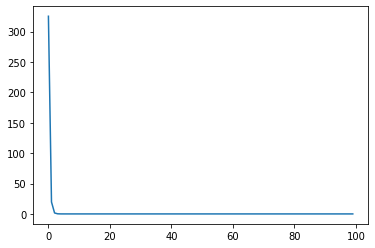

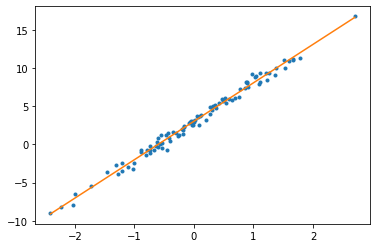

5.03829526745079 3.0391018029730192


In [7]:
n = 100
x = np.sort( np.random.normal(0,1,n) )
y = x * 5 + 3 + np.random.normal(0,0.5,n)

w = np.random.rand() * 20 - 10 
b = 0 
ds = []
for step in range(100):  
  d =  y - (w * x + b) 
  w += np.sum( d * x ) * 0.01    
  b += np.sum(d) * 0.01
  ds += [abs(np.sum(d))]

plt.plot(ds)
plt.show()

plt.plot(x,y,'.')
plt.plot(x, x*w + b)
plt.show()

print(w,b)



#### <font color = 'chocolate'>실습: 다중 회귀에 bias 적용하기
$ y = 4x1 - 3x2 + 5$
의 데이터를 만들고 다중회귀에 bias 를 적용하여 학습해보자. 
</font>


<br><br><br>

<hr> 
<br>

# 분류와 Sigmoid 함수


### or 문제 해결해보기
이번에는 분류문제를 해결해보자. 분류문제중에 가장 간단한 or 문제를 먼저 생각해보자. 무척 간단하다고 생각할 지도 모르겠다.  위에서 직선의 연관성을 도출한 것에 비하면 이것이 훨씬 쉽게 느껴질 수도 있다. 먼저 데이터를 만들어보자. 


In [12]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,1])

이제 위에서 사용한 알고리즘을 돌려보도록 하자. 

result: [0.         0.66667448 0.66665885 1.33333333] error: 1.0


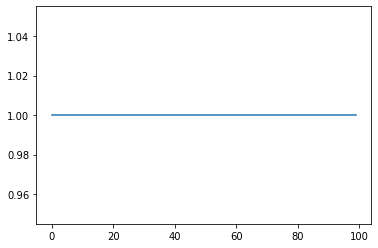

In [13]:
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(100):         
    d = y - np.sum(x * w, axis = 1)    
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", np.dot(x,w), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()


우리가 원하는 답은 0,1,1,1 이지만 알고리즘의 출력은 0,0.6, 0.6 1.3  정도가 나올 것이다.  왜 이런 문제가 생길까? 

정답은 0,1 에도 1을  만들고 1,0 에도 1을 만들지만 1,1 에도 1을 만드는 방법은 없다는 것이다. 왜냐하면 우리가 사용하는 방법은 단순히 입력에 가중치를 더해서 합산하는 방법에 지나지 않기 때문이다.  이런 방식은 실수값을 예측하는 회귀문제에는 잘 맞지만 범주형 데이터를 다루는 분류문제에는 적합하지 안다. 


#### sig 함수 만들기

이런 문제를 해결하기 위해서는 어떤 현상이 발생하는 확률을 계산하기 위한 함수인 sigmoid 함수가 적합하다. 이 함수의 정의는 다음과 같다. 



In [14]:
def sig(x):
    return 1 / ( 1 + np.exp(-x) )

def sigp(x):
    return x * ( 1 - x )     

이 함수는 결과적으로 다음과 같은 형태를 띄며 결국 모든 값을 0 ~ 1 사이로 만들어 버린다. 그리고 경계를 기점으로 기울기가 양쪽으로 다 0 에 수렴한다.  결국 이 함수를 이용하면 0과 1 같은 상태를 표현하는데 적합하다. 

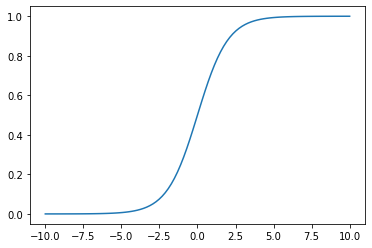

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.linspace(-10,10,100)
y = sig(x)
plt.plot(x,y)
plt.show() 

#### sig 함수를 사용해 or 문제 해결

이제 이 함수를 사용해 위의 예제를 풀어보도록 하겠다. 이번에는 좀더 많은 시행을 시켜보자. 

In [ ]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,1])

n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(10000):         
    o = sig(np.sum(x * w, axis = 1) ) 
    d = y - o 
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1  
    ds = np.append(ds,np.abs(d).sum())        
print("result:", np.round( sig( np.dot(x,w) ), 4), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()



In [17]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,1])
b = 0
w = np.random.random(2)
for step in range(1000):
  for i in range(4):
    o = sig(np.sum(w * x[i]) + b)
    d = y[i] - o
    w += d * 0.1 * x[i]
    b += d * 0.1
    if step == 999:
      print(o)



0.050677155733818986
0.9798330199455526
0.9798197626137337
0.9999776216583329


0.0
0.013
0.013
0.99
0.013
0.99
0.99
1.0


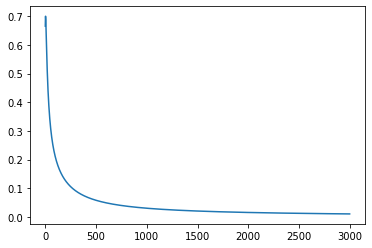

In [23]:
#and문제 
# x = np.array([[0,0], [0,1], [1,0], [1,1]] )
# y = np.array([0,0,0,1])
x = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],
             [1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = np.array([0,0,0,1,0,1,1,1])
b = 0
w = np.random.random(3) #2
ds = []
for step in range(3000):
  dsum = 0 # 합산해서 보기 
  for i in range(8): #4
    o = sig(np.sum(w * x[i]) + b)
    d = y[i] - o
    dsum += d
    
    w += d * 0.1 * x[i]
    b += d * 0.1
    if step == 2999:
      print(np.round(o,3))
  ds += [abs(dsum)] #abs는 절대값 처리 

plt.plot(ds)

이제 3가지 결과값은 상당히 1에 근접한 것을 볼 수 있다. 또한 학습또한 1을 넘김으로서 발생하는 오차에 구애받지 않고 가중치를 증가시켰음을 알 수 있다. 하지만 0,0 의 값이 0.5 가 나온 것에 대한 불만이 있을 것이다. 이것은 위의 sig  함수가 -무한대 부터 +무한대 까지의 범위를 받는 함수이기에 발생하는 문제이다. 우리가 구하는 w는 sig 함수의 기울기를 변경할 뿐이지 그 경계점을 변경하지는 안는다.


#### bias 를 적용해보기 

이것을 해결하기 위해선 위에서 언급한 bias 값을 적용해주어야 한다. 
```
sig(x * w) => sig(x * w + b) 
```
이런 형태로 수식을 변경했을 경우 경계의 위치는 이 b 에 의해 좌우되기 때문이다.  이를 적용하면 다음과 같다. 


In [ ]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,1])

n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
b = 0  # bias 초기화 
ds = np.array([])
for step in range(10000):         
    o = sig(np.sum(x * w, axis = 1) + b ) 
    d = (y - o)
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    b +=  np.sum(d) * 0.1  # bias 값 업데이트
    ds = np.append(ds,np.abs(d).sum())        
print("result:", np.round( sig( np.dot(x,w) + b ), 4), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()

이제는 bias 가 적용되어 원래 0,1,1,1 에 근접한 값이 나왔을 것이다. 

In [ ]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,0,0,1])
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(1000):         
    o = sig(np.sum(x * w, axis = 1) ) 
    d = y - o 
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", sig( np.dot(x,w) ), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()


생각보다 결과가 좋지 안음에 갸웃할 것이다. 사실 가만히 생각해봐도 and 는 or 에 비해 훨씬 더 정교한 문제이다. 그런 문제를 다룰때 위에서 우리가 다룬 x 를 기반 오차를 결정하는 방법은 이처럼 x 가 0이나 1에 고정되는 방식일 경우 그 한계가 드러난다. 오차가 발생하는 범인은 x 만이 아니기에 우리는 여기서 w도 그 원인의 하나로 그 오차율에 영향을 고려해야 한다. 

이제 w의 변경치인 wd 공식을 다음과 같이 변경하도록 하겠다. 

$$ \large wd = w * x * d $$

이는 weight 와 x 의 연산이 필요하므로 다음과 같은 공식을 거친다. 


#### and gate 해결법

In [ ]:


x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,0,0,1])
n,dm = 4,2
w_init = np.random.random(dm)

w = w_init.copy()
b = 0 

ds = np.array([])
for step in range(10000):         
    o = sig( np.sum(x * w, axis = 1) + b)
    d = (y - o) #* sigp(o)
    wd =  np.sum( (x * w).T * d , axis = 1) 
    w += wd     
    b += np.sum(d) * 0.01
    ds = np.append(ds, np.abs(d).sum())      

print("result:", sig( np.dot(x,w) + b ).round(4), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()

<br><br><br>

<hr> 
<br>


# 다층 신경망 


### XOR 문제
위에서 우리가 다룬 것은 초기 학자들이 연구하던 단층 신경망의 예이다. 당시에는 이러한 분류에 대한 수학적인 방법론들이 정립되지 안았기 때문에 이런 단층 신경망으로 문제를 해결하는 것도 놀랍게 느껴졌지만 결국 이러한 신경망은  

$$ y = w1x1 + w2x2 + ..  $$

의 구조를 지니며 이것은 1차원이든 2차원이든 3차원이든 직선이나 평면에 의한 문제의 분류밖에 해결하지 못한다는 것이 증명되고 그 한계로 XOR 문제가 제시되었다. 

XOR 문제는 간단한다. 
```
0,0 -> 0
0,1 -> 1
1,0 -> 1
1,1 -> 0 
```
이 되며 이는 결과적으로 평면상에 다음과 같은 형태로 표현된다. 




In [ ]:
plt.scatter([0,0,1,1],[0,1,0,1], c=[0,1,1,0])

In [ ]:

x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,0])
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
b = 0 


이 문제를 위에서 다뤘던 방식으로 풀려고 해보면 결과가 전혀 나오지 안는다. 

In [ ]:

ds = np.array([])
for step in range(5000):         
    o = sig( np.sum(x * w, axis = 1) + b)
    d = y - o 
    wd =  np.sum( (x * w).T * d , axis = 1) 
    w += wd     
    b += np.sum(d) * 0.01
    ds = np.append(ds,np.abs(d).sum())      

print("result:", sig( np.dot(x,w) + b ).round(4), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()


이 문제를 해결하기 위해 나온 이론이 입력과  출력사이에 중간레이어를 두는 방법이다.  지금까지 우리가 다뤘던 신경망이 다음과 같은 구조라면 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile10.uf.tistory.com%2Fimage%2F261AC64E56C2D0E7241637" 
    width = 400
    style = "float:left"     
    title = "출처: https://untitledtblog.tistory.com/27" > 
    



다층 신경망은 다음과 같은 구조를 지닌다. 단, 아래에는 은닉층이 하나인 경우에 대한 예시일 뿐이지만 은닉층은 얼마든지 여러층으로 만들 수 있다. 

<img src = "https://mblogthumb-phinf.pstatic.net/MjAxNzA2MTZfMzQg/MDAxNDk3NTc4MDc4NTU4.C0svtndk_igat9FquGev3il4HWs2mEKarZPuzI0kgMcg.75f89hjNck6eLQNZWQ4-QZiWNnArNKnuEXvxoL3n0aAg.PNG.samsjang/%EC%BA%A1%EC%B2%98.PNG?type=w2" 
    width = 600
    style = "float:left"     
    title = "출처: https://m.blog.naver.com/samsjang/221030487369" > 



이와 같은 간단한 발상을 왜 못했을까? 하는 생각이 들 것이다. 하지만 오류를 최소화하는 1차원적인 발상으로는 저 은닉층을 거치는 weight 값을 어떻게 처리해야 할지 당시에는 몰랐다.  그리고 이 문제를 해결한 것이 '오류역전파 모델' 이다. 

### 오류 역전파 모델 


위의 예제에서 우리는 오류에 대한 책임을 죄다 w 에 돌려버렸다. 당연한것이 입력인 x는 고정되어있기 때문에 우리가 수정 가능한 것은  w 밖에 없었기 때문이다. 하지만 역전파 모델에서는 그 입력의에도 책임을 돌린다.그래야 은닉층의 오류를 기반으로 다시 그 이전계층의 가중치 w 에 대한 수정이 가해지기 때문이다. 

위의 그림을 기준으로 입력을 i ,은닉을 h, 출력을 o 라고 할 경우 신경망이 결과를 도출하는 과정은  i -> h -> o 의 형태로 이뤄지지만 망에 대한 수정은 o -> h -> i 방향으로 진행된다. 이것은 여러개의 은닉층을 가진 경우에도 마찬가지로 역으로  진행되기에 '역전파 모델' 이라고 불리우며 현재까지 모든 신경망 학습의 기본원리이다. 


역전파의 방법은 간단히 설명하면 다음과 같다. 

- 에러는 그 이전층에 각각의 웨이트를 곱해서 전달된다. 
- 웨이트의 보정은 이전층의 입력값을 곱해서 전달된다. 


이것의 수학적 모델은 매우 심플하다. w 는 w 가 오류에 얼마나 어떤 방향으로 영향을 주었는가를 기준으로 그 수치를 업데이트 하고 은닉층은 은닉층의 값이 얼마나 어떤 방향으로 오류에 영향을 주었는가를 계산한다. w 의 오류는 w 값의 변화로서 영향을 주며 은닉층의 오류는 다시 이를 기준으로 그 이전계층의 w 오류를 계산하는데 사용된다. 

다만 좀더 세밀히 접근하면 단순히 값에 영향을 준 사실 보다도 그 x 가 오류에 얼마나 큰 차이를 준 것인지 기울기를 구하여 그 조정양을 조절하게 되는데 이때 미분이 사용된다. 하지만 이 부분은 지금은 무시하고 영향력을 중심으로 생각해도 좋다. 



이제 이를 기반으로 xor 문제를 풀 수 있도록 다계층 신경망을 생각해보자. 

In [34]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,0])

0.05457564174517687
0.9501273314341749
0.9502061027175411
0.053486730008314526


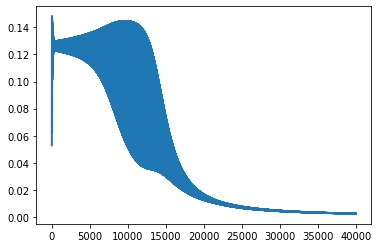

In [39]:
lr = 0.1
w2 = np.random.random(2)
w1 = np.random.random((2,2))
b1 = np.random.random(2)
b2 = np.random.random()
#b = 0
'''
x1 x2
  |  w1
h1 h2 (히든) ---- b1
  |  w2
  y (output) ---- b2
'''
ds = []
for step in range(10000): # 1000
  for i in range(4): # 4
    h = sig( np.sum( x[i] * w1, axis = 1) + b1 )
    o = sig(np.sum(h * w2) + b2)#sig(np.sum(x[i] * w) + b)
    
    d = (y[i] - o)*sigp(o)
    d1 = d * w2 * sigp(h)

    w2 += d * lr * h #x[i]
    b2 += d * lr

    w1 += x[i] * d1.reshape(-1,1) * lr
    b1 += d1 * lr

    ds += [abs(d)]

    if step == 9999:
      print(o)

plt.plot(ds)

위의 설명을 기반으로한 코드는 다음과 같다. 



In [ ]:
hsize = 4

w1 = np.random.random((hsize,2))
w2 = np.random.random((hsize))
lr = 0.1
ds = [] 
b1,b2 = np.random.random(), np.random.random()

epochs = 10000
for step in range(epochs):
  for i in range(4):
 
    h = sig( np.sum(x[i] * w1, axis = 1) + b1 )        
    o = sig( np.sum( h * w2 ) + b2 )      
    
    d =  ( y[i] - o )
    d1 = d * w2 
    w2 += d * h * lr
    b2 += d * lr

    w1 += x[i] * d1.reshape(-1,1) * lr
    b1 += d1 * lr

    if step == epochs - 1 : 
      print(o)
    ds += [abs(d)]
#print("result:",b1,b2)
plt.plot(ds)
print("last d:", ds[-1])



하지만 이대로는 결과가 나오지 안는다.   그 이유는 출력값이 sigmoid 함수를 거쳐서 나오기 때문이다. 분류문제에서는 회귀에서 사용하는 계산식을  다시 sigmoid 에 넣어서 연산한다. 

$ z = w_1x_1 + w_2x_2 + .. b $

회귀문제를 해결할때 사용하는 출력을 z 라고 가정할때 z 의 오차와 sig(z) 의 오차는 서로 다르다. 이때 오차의 비율을 맞춰주기 위해서는 sig 함수의 기울기를 구해서 그 경사에 따라 오차를 구해준다.

특정 값에서의 기울기를 구하기 위해서는 sigmoid 함수의 미분함수를 사용하면 된다. sigmoid 함수의 미분함수는 다음과 같다. 

```
def sigp(x):
    return x  * (1-x)
```

예를 들어 출력값이 0.5 이고 sig(z) 의 오차가 0.3 이면 오차값에 sigp(0.5) 를 곱해준다. 

$ 0.3 \times 0.5 \times ( 1 - 0.5 ) $ 

xor 는 보기보다 상당히 미묘한 문제이며 다른 문제와는 달리 이런 부분까지 세세하게 정의를 해줘야 해결이 된다. 또한 시행횟수도 10000 단위 이상 필요한 경우가 많다. 



In [ ]:
def sigp(x):
    return x  * (1-x)

hsize = 4

w1 = np.random.random((hsize,2))
w2 = np.random.random((hsize))
lr = 0.1
ds = [] 
b1,b2 = np.random.random(), np.random.random()

epochs = 10000
for step in range(epochs):
  for i in range(4):
 
    h = sig( np.sum(x[i] * w1, axis = 1) + b1 )        
    o = sig( np.sum( h * w2 ) + b2 )      
    
    d =  ( y[i] - o ) * sigp(o)
    d1 = d * w2  * sigp(h)
    w2 += d * h * lr
    b2 += d * lr

    w1 += x[i] * d1.reshape(-1,1) * lr
    b1 += d1 * lr

    if step == epochs - 1 : 
      print(o)
    ds += [abs(d)]
#print("result:",b1,b2)
plt.plot(ds)
print("last d:", ds[-1])

그래프가 특이하지만 여하튼 결국 해에 근접한 것을 볼 수 있었을 것이다. 다음은 이것을 epoch 단위로 한번에 처리하도록 고친 코드이다. 복잡한 연산을 해결하기 위해서 dot 함수를 사용하였다. dot 함수는 다음과 같은 연산을 한다. 




In [ ]:
x,y = np.array( ([1,1],[10,10]) ), np.array( [[1,0],[2,0]] )
print( x.dot(y) )

상당히 복잡하기 때문에 이 부분에 대한 설명은 생략하도록 하겠다. 여유가 있는 사람은 이 코드가 어떻게 작동되는지 곰곰히 생각해보길 추천한다. 

In [ ]:
import numpy as np 
#np.random.seed(0)

def sig (x):
    return 1/(1 + np.exp(-x))

def sigp(x):
    return x * (1 - x)

#Input datasets
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

epochs = 10000
lr = 0.1
xn, hn, yn = 2,2,1

ds = [] 

for _ in range(epochs):	
  h = sig( np.dot(x, w1) + b1 )  
  o = sig( np.dot(h, w2) + b2 )
  d = ( y - o )* sigp(o)
  ds += [ abs( np.sum(d) ) ]
  dh = d.dot(w2.T) * sigp(h)
  w2 += h.T.dot(d) * lr 
  b2 += np.sum(d, axis = 0, keepdims = True) * lr   
  w1 += x.T.dot(dh) * lr 
  b1 += np.sum(dh, axis = 0, keepdims = True) * lr 


print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*o)
plt.plot(ds)
plt.show()
